In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Set up plot style and font
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.style.use('ggplot')
cmap = plt.cm.get_cmap('tab20c')

def set_figuresize(height=6.0):
    '''Set figure size. The width and height are set to have the Golden ratio.'''

    width = height*0.5*(1.0+np.sqrt(5.0))
    plt.rcParams['figure.figsize'] = (width, height)

In [5]:
set_figuresize(6.5)

In [114]:
def z(theta):
    zx = np.cos(theta)
    zy = 2 + np.sin(theta)
    return zx, zy

def zsqrt(zx, zy, riemann):
    r = np.sqrt(zx*zx + zy*zy)
    # Use the 4-quadrant version of arctan instead of the 2-quadran one
    # cf: https://stackoverflow.com/questions/35749246/python-atan-or-atan2-what-should-i-use
    #     https://en.wikipedia.org/wiki/Atan2
    phi = np.arctan2(zy, zx)
    phi += 2*np.pi*riemann
    wx = np.sqrt(r)*np.cos(0.5*phi)
    wy = np.sqrt(r)*np.sin(0.5*phi)
    return wx, wy

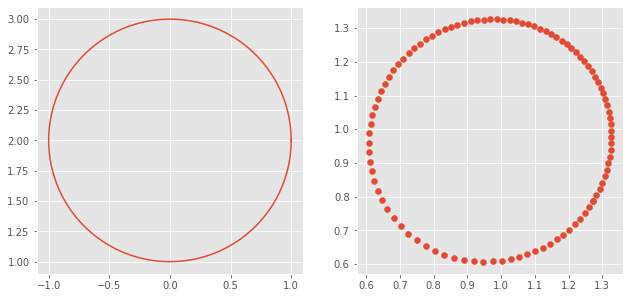

In [115]:
theta = np.linspace(0, 2*np.pi, 100)
zx, zy = z(theta)

wx, wy = [], []
for x, y in zip(zx, zy):
    tx, ty = zsqrt(x, y, 0)
    wx.append(tx)
    wy.append(ty)

fig1, ax = plt.subplots(1, 2)
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[0].plot(zx, zy, label=r'$z$')
ax[1].scatter(wx, wy, label=r'$w(z)$')
# plt.legend(fontsize=20)
plt.show()